In [60]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [61]:
from Legendre import *
from Library import * 

# Premier test sur un jeu de données échantilloné linéairement

In [62]:
# <Leg_m, t^j>, on veut trouver 0
L = Legendre(5,  [i/1000 for i in range(1000)])
res = 0
for i in [i/1000 for i in range(1000)] :
    res+= L(i)*i**3

res

-1.816472319782214e-14

In [50]:
# On vérifie les polynômes de Lagrange ==> On veut L_i(t) = 1 si t = T_i et 0 si t = T_j où j!=i
roots = roots_leg(5,  [i/1000 for i in range(1000)])
def Lagrange(i, roots):
    L = np.poly1d([1]) # 1
    ai = roots[i]
    for a in np.delete(roots, i):
        L = L*1/(ai-a)*np.poly1d([1, -a])
    return L
L = Lagrange(2, roots)
L(roots[2]), L(roots[3]), L(roots[1]) # 1, 0, 0 en théorie

(0.9999999999999978, 0.0, -7.66053886991358e-15)

In [5]:
## Sum(Lag_i ^2) = n 
res = 0 
for i in range(5):
    L = Lagrange(i, roots)
    res+=sum([L(i)**2 for i in [i/1000 for i in range(1000)]])

res # 1000 en théorie

999.9999999999944

# Test sur les données de radiosondage

In [67]:
data = Cn2.read_csv('/scratchm/eklotz/Cn2_Tenerife_2020_fromSoundings.csv')

In [68]:
data.rm_zeros()
data.set_ground_level(inplace = True)
data.filtre(50)


100%|██████████| 714/714 [00:00<00:00, 870.85it/s]


In [70]:
time = data[0].time.values
alt = data[0].alt.values
Cn2 = data[0].Cn2.values

Text(0, 0.5, 'Altitude en mètres')

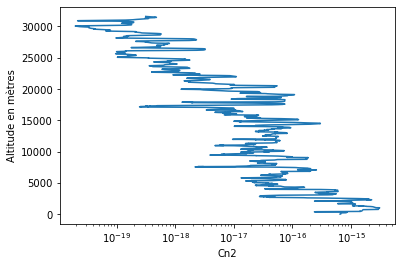

In [71]:
plt.semilogx(Cn2, alt)
plt.xlabel('Cn2')
plt.ylabel('Altitude en mètres')

Text(0, 0.5, 'Temps depuis le lâché en secondes')

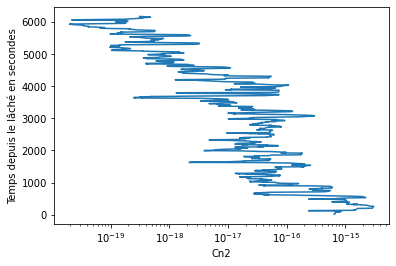

In [72]:
plt.semilogx(Cn2, time)
plt.xlabel('Cn2')
plt.ylabel('Temps depuis le lâché en secondes')

In [73]:
alt_cropped = alt[alt <= 30000] # On garde jusqu'à 30km
Cn2_cropped = Cn2[:len(alt_cropped)]
alt_cropped_norm = alt_cropped/alt_cropped[-1] # On normalise 

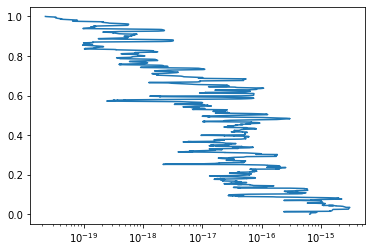

In [74]:
plt.semilogx(Cn2_cropped, alt_cropped_norm)

In [75]:
# On vérifie les polynômes de Lagrange ==> On veut L_i(t) = 1 si t = T_i et 0 si t = T_j où j!=i
roots = roots_leg(15, alt_cropped_norm)
L = Lagrange(2, roots)
L(roots[2]), L(roots[3]) # On attend 1 et 0 


(1.0000000118567829, 6.880154168609209e-09)

In [76]:
## Sum(Lag_i ^2) = n 
res = 0 
for i in range(15):
    L = Lagrange(i, roots)
    res+=sum([L(i)**2 for i in alt_cropped_norm])

res, len(alt_cropped_norm) # On attend la même valeur

(5303.786601862362, 5304)

In [77]:
intp = interp_gauss_legendre(15,alt_cropped_norm, Cn2_cropped)
intp # Mes points d'interpolation

(array([0.00749596, 0.03567509, 0.08048825, 0.14062299, 0.21606777,
        0.30686108, 0.40033393, 0.50085378, 0.5994044 , 0.69617389,
        0.78436741, 0.86147338, 0.92371858, 0.96862081, 0.99408772]),
 [8.355129905324402e-16,
  1.7693074524044202e-15,
  7.599687689785215e-16,
  1.1288994153678336e-16,
  7.908849103411327e-17,
  4.807324347082053e-17,
  4.3359153211137696e-17,
  5.604202313824818e-17,
  2.371401155072834e-17,
  2.1219786677741098e-17,
  -5.6519488236226384e-18,
  5.319103338230993e-18,
  -2.6056826557343715e-18,
  2.7519150995594108e-18,
  -1.5662401529625532e-18])

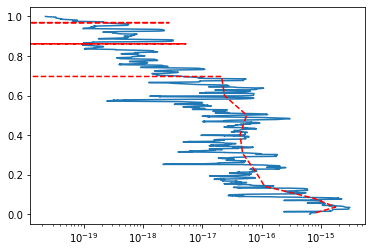

In [78]:
plt.semilogx(Cn2_cropped, alt_cropped_norm)
plt.semilogx(intp[1], intp[0], 'r--') # En rouge la courbe d'interpolation 

In [79]:
simps(Cn2_cropped, alt_cropped_norm), simps(intp[1], intp[0]) ## Valeur de l'intégrale du profil et de l'interpolation 

(1.5764548192473643e-16, 1.559001275190074e-16)

In [80]:
r0 = lambda x, t : np.power((0.423*(2*np.pi/1.55e-6)**2*simps(x, t)), (-3/5)) # R0

In [81]:
r0(Cn2_cropped, alt_cropped), r0(intp[1], intp[0]*alt_cropped[-1]) # ## On calcul R0 sur le profil et son interpolation 

(0.12301287734632947, 0.12383733914323526)

## Test avec un deuxième profil

In [106]:
## 100 iéme profil
time = data[268].time.values
alt = data[268].alt.values
Cn2 = data[268].Cn2.values
#alt_cropped = alt[alt <= 30000] # On garde jusqu'à 30km
alt_cropped = alt
Cn2_cropped = Cn2[:len(alt_cropped)]
alt_cropped_norm = alt_cropped/alt_cropped[-1] # On normalise 

In [107]:
intp = interp_gauss_legendre(15,alt_cropped_norm, Cn2_cropped)
intp # Mes points d'interpolation

(array([0.00702476, 0.03031373, 0.08131737, 0.13793543, 0.21597973,
        0.3030381 , 0.39277007, 0.50569265, 0.60285743, 0.69630457,
        0.78411665, 0.86081947, 0.92330514, 0.9680996 , 0.99386253]),
 [1.179005000416798e-16,
  4.3056171816465774e-16,
  1.3830247912034306e-15,
  1.0536077339263954e-16,
  1.2870455382747388e-16,
  -4.893649108130294e-17,
  1.478409405490061e-16,
  9.239489797324492e-17,
  2.189336918860721e-17,
  1.2858347020730415e-17,
  1.8383649988219408e-20,
  1.8204470957553892e-18,
  -1.7805150229231272e-19,
  5.858219705682116e-19,
  -6.667412928549786e-20])

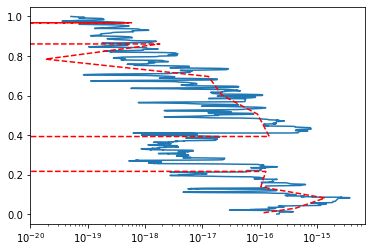

In [108]:
plt.semilogx(Cn2_cropped, alt_cropped_norm)
plt.semilogx(intp[1], intp[0], 'r--') # En rouge la courbe d'interpolation 

In [109]:
simps(Cn2_cropped, alt_cropped_norm), simps(intp[1], intp[0]) ## Valeur de l'intégrale du profil et de l'interpolation 

(1.3802952328551025e-17, 1.0800429873875057e-16)

In [110]:
r0(Cn2_cropped, alt_cropped), r0(intp[1], intp[0]*alt_cropped[-1]) # ## On calcul R0 sur le profil et son interpolation 

(0.5225189908577549, 0.15206198219353584)

## Et un troisième profil


In [88]:
## 100 iéme profil
time = data[50].time.values
alt = data[50].alt.values
Cn2 = data[50].Cn2.values
alt_norm = alt/alt[-1] 
intp = interp_gauss_legendre(15,alt_norm, Cn2)
intp 

(array([0.00782191, 0.03218164, 0.07730933, 0.14029424, 0.21720382,
        0.30818895, 0.40174864, 0.50076461, 0.59959538, 0.69632624,
        0.78483557, 0.86229028, 0.92401954, 0.96977148, 0.99410297]),
 [4.356613533823866e-15,
  -1.8652535581971176e-17,
  1.5629107167501706e-15,
  -3.1176219898579433e-16,
  3.3069234250475395e-16,
  -1.8561622756911426e-16,
  1.914756843541201e-16,
  -1.0030515807853993e-16,
  1.330423642453706e-16,
  -7.799463511538171e-17,
  7.783641205917023e-17,
  -6.628484623254887e-17,
  5.475177319743383e-17,
  -4.3550256113068665e-17,
  2.967303009386921e-17])

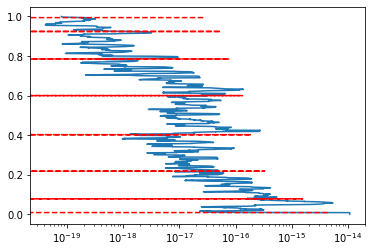

In [89]:
plt.semilogx(Cn2, alt_norm)
plt.semilogx(intp[1], intp[0], 'r--') # En rouge la courbe d'interpolation 

In [90]:
simps(Cn2, alt_norm), simps(intp[1], intp[0]) ## Valeur de l'intégrale du profil et de l'interpolation 

(1.8906164833090747e-16, 2.4223235757457828e-17)

In [91]:
r0(Cn2, alt), r0(intp[1], intp[0]*alt[-1]) # ## On calcul R0 sur le profil et son interpolation 

(0.109857668207971, 0.3769234407954138)

## Commment découper les profils ? 

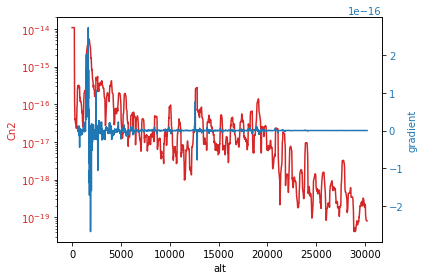

In [95]:

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('alt')
ax1.set_ylabel('Cn2', color=color)
ax1.semilogy(alt, Cn2, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('gradient', color=color)  # we already handled the x-label with ax1
ax2.plot(alt[100:], np.gradient(Cn2)[100:], color=color)# fort effet de bord si je prends les premieres valeurs du gradient
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

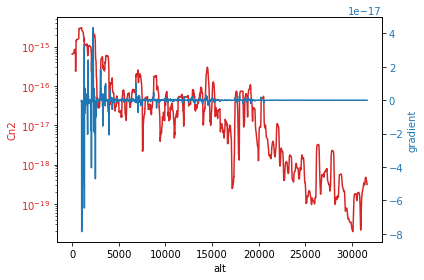

In [97]:
time = data[0].time.values
alt = data[0].alt.values
Cn2 = data[0].Cn2.values
# On cherche a faire disparaitre l'effet de bord
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('alt')
ax1.set_ylabel('Cn2', color=color)
ax1.semilogy(alt, Cn2, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('gradient', color=color)  # we already handled the x-label with ax1
ax2.plot(alt[100:], np.gradient(Cn2, alt)[100:], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [105]:
data.moments().r0.values[268]

0.5225189908577549